In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df = pd.read_csv('./data/cleaned_car_prices_under_mill.csv')

In [6]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,original_price_missing,car_availability_missing,transmission_missing,car_rating_codes
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,"404,177.00",great,2021-04-04T07:09:18.583,True,8975,57960,False,False,0,0,0,3
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,"354,313.00",great,2021-03-22T14:07:32.833,True,6167,39825,False,False,0,0,0,3
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,"488,119.50",great,2021-03-20T05:36:31.311,True,11096,71655,False,False,1,0,0,3
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,"374,326.00",great,2021-01-21T12:59:19.299,True,7154,46200,False,False,0,0,0,3
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,"367,216.00",great,2021-04-01T13:33:40.733,True,8397,54225,False,False,0,0,0,3


In [7]:
df['sale_price'].describe()

count     6,866.00
mean    414,170.98
std     185,447.22
min      20,000.00
25%     278,824.00
50%     374,299.00
75%     514,349.00
max     999,199.00
Name: sale_price, dtype: float64

<Axes: >

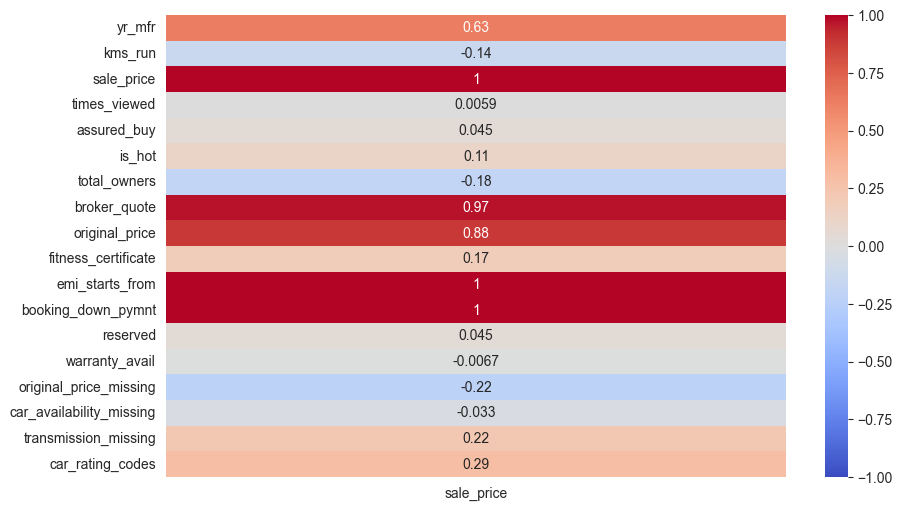

In [8]:
sns.heatmap(df.corr(numeric_only=True)[['sale_price']],
           vmin=-1,
           vmax=1,
           annot=True, 
           cmap='coolwarm')

In [9]:

columns = ['yr_mfr', 'total_owners', 'kms_run', 'transmission_missing', 'car_availability_missing', 'car_rating_codes']
nominal_columns = ['transmission', 'make', 'model', 'body_type', 'source', 'fuel_type', 'car_availability', 'city', 'variant'] 


In [10]:
X = df[columns+nominal_columns]
y = df['sale_price']

In [11]:
# X = pd.get_dummies(X, columns=nominal_columns)

In [12]:
# scores = []
# for i in np.arange(0.2, 0.4, 0.01):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_columns)
#         ],
#         remainder='passthrough'
#     )
#     model = Pipeline(
#         steps=[
#             ("preprocess", preprocessor),
#             ("regressor", LinearRegression())
#         ]
#     )
#     model.fit(X_train, y_train)
#     r2 = model.score(X_test, y_test)
#     y_preds = model.predict(X_test)
#     rmse = root_mean_squared_error(y_test, y_preds)
#     baseline_preds = np.full_like(y_test, y_test.mean())
#     b_rmse = root_mean_squared_error(baseline_preds, y_test)
#     scores.append({'size': i, 'r2': r2, 'rmse': rmse, 'baseline rmse': b_rmse})

In [13]:
# score_df = pd.DataFrame(scores)

In [14]:
# score_df.sort_values(by=['r2', 'rmse'], ascending=False)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_columns)
    ],
    remainder='passthrough'
)

In [17]:
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("regressor", LinearRegression())
    ]
)

In [18]:
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
model.score(X_test, y_test)

0.8514361247934012

## Pickling

In [20]:
import pickle

In [21]:
# with open('linreg.pkl', 'wb') as file:
#     pickle.dump(model, file)

## KNN Regression

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold

In [23]:
columns = ['yr_mfr', 'total_owners', 'kms_run', 'transmission_missing', 'car_availability_missing', 'car_rating_codes']
nominal_columns = ['transmission', 'make', 'model', 'body_type', 'source', 'fuel_type', 'car_availability', 'city', 'variant'] 

In [24]:
columns_to_scale = ['yr_mfr', 'total_owners', 'kms_run', 'car_rating_codes']

In [25]:
X = df[columns+nominal_columns]
y = df['sale_price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_columns),
        ("scale", StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'
)

In [28]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [29]:
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("knn", KNeighborsRegressor())
    ]
)

In [30]:
param_grid = {
    "knn__n_neighbors": np.arange(3, 25, 2),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]
}

In [31]:
grid = GridSearchCV(model,
                   param_grid=param_grid,
                   cv=kfold)

In [32]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'knn__metric': ['euclidean', 'manhattan'], 'knn__n_neighbors': array([ 3, 5..., 19, 21, 23]), 'knn__weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('scale', ...)]"


In [33]:
grid.score(X_test, y_test)

0.8667362744860867

In [34]:
y_preds = grid.predict(X_test)

In [35]:
root_mean_squared_error(y_test, y_preds)

67721.94881023651

In [36]:
# with open('knnreg.pkl', 'wb') as file:
#     pickle.dump(grid, file)

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
columns = ['yr_mfr', 'total_owners', 'kms_run', 'transmission_missing', 'car_availability_missing', 'car_rating_codes']
nominal_columns = ['transmission', 'make', 'model', 'body_type', 'source', 'fuel_type', 'car_availability', 'city', 'variant'] 

In [39]:
columns_to_scale = ['yr_mfr', 'total_owners', 'kms_run', 'car_rating_codes']

In [40]:
X = df[columns+nominal_columns]
y = df['sale_price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_columns),
        ("scale", StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'
)

In [43]:
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("rf", RandomForestRegressor())
    ]
)

In [44]:
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scale', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
model.score(X_test, y_test)

0.9175307754696691

In [46]:
y_preds = model.predict(X_test)

In [47]:
root_mean_squared_error(y_test, y_preds)

53274.505528962174

In [48]:
# with open('rf.pkl', 'wb') as file:
#     pickle.dump(model, file)

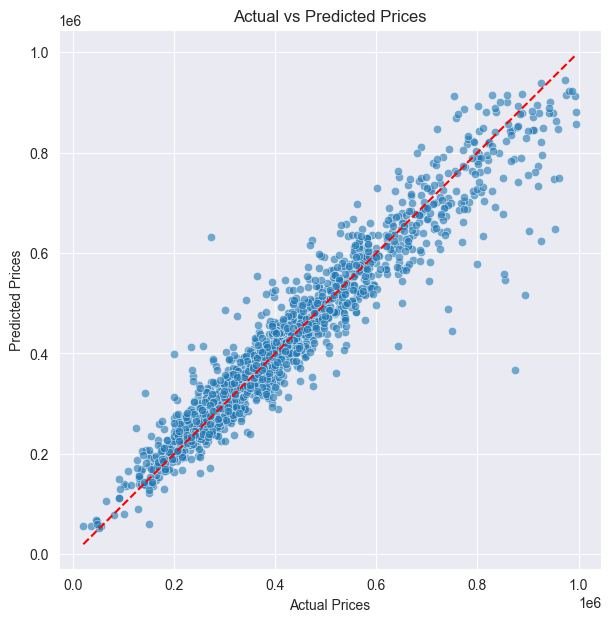

In [49]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_preds, alpha=0.6)

min_val = min(y_test.min(), y_preds.min())
max_val = max(y_test.max(), y_preds.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

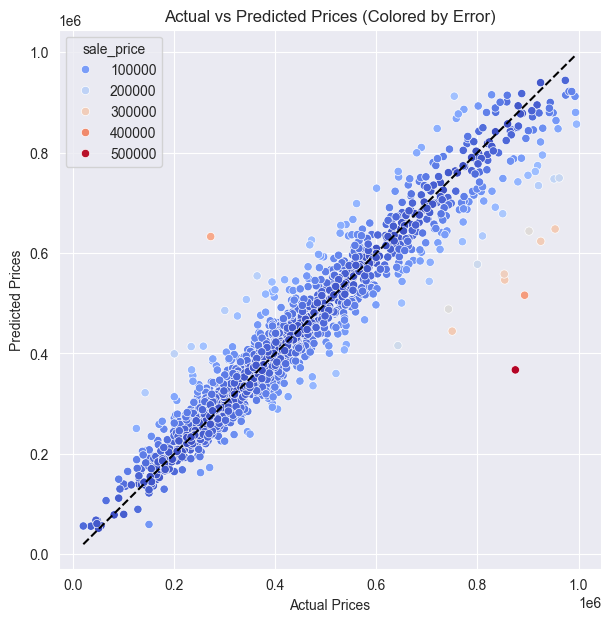

In [50]:
errors = abs(y_test - y_preds)

plt.figure(figsize=(7, 7))
sns.scatterplot(
    x=y_test,
    y=y_preds,
    hue=errors,
    palette="coolwarm",
    legend=True
)

plt.plot([min_val, max_val], [min_val, max_val], 'k--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Colored by Error)")
plt.show()